# **Selección del Dataset y algunas consideraciones**

El dataset elegido se trata de la librería de juegos de la plataforma Steam con sus respectivos estudios, valoraciones, media de horas de juego, promedio de horas de juego entre otra información de interés.

La utilización de este dataset permitirá plantear alguna hipótesis y preguntas considerando algunas de las variables anteriormente mencionadas y la relación entre las mismas.

La última fecha de actualización del dataset es mayo 2019 pero a los efectos de las hipótesis que se plantearán, resulta irrelevante qué tan actualizada está la información.


# **Motivación**

La elaboración del dataset y la información contenida en el mismo permite el análisis de la industria del gaming, más específicamente desde el catálogo de Steam y sus míles de títulos. El planteo de múltiples preguntas como cuáles son los juegos más jugados en horas promedio, cuáles son los estudios que cuentan con más títulos en la plataforma de Steam, qué relación hay entre las valoraciones positivas de un juego y su respectivo precio, o como evolucionan los precios dentro del catálogo de un estudio con el paso de los años, entre otras tantas hipótesis que es posible plantear y responder utilizando este dataset.




# **Audiencia**

Este dataset contiene información de gran utilidad para todas aquellas organizaciones que elaboran, distribuyen y/o analizan software relativo al gaming, ya que del mismo se puede obtener información relativa a precios, tendencias de compra, actividad por género, por estudio, cantidad de horas promedio, media de horas y otros.
La utilización de estos datos resulta de utilidad al momento de fijar precios o acuerdos de contrato con la plataforma de Steam al momento de publicar un juego o en mayor escala un catálogo de un estudio con distintos títulos y propuestas.

# **Hipótesis y preguntas**



*   Hipótesis 1: los estudios con más juegos lanzados por año son los que acumulan más horas de juego promedio.

*   Hipótesis 2: el precio promedio de la librería aumenta anualmente.

*   Hipótesis 3: los juegos con más valoraciones positivas son los más caros.

Las preguntas específicas con relación al dataset se irán desprendiendo a medida que vayamos visualizando resultados.






In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests 
import json

# Definiendo estilo:

# mpl.style.use('seaborn-pastel')

# Lectura de dataset:

st = pd.read_csv('steam.csv')

# Agrego columna Year al df para ser utilizada en más de un gráfico

st['release_date'] = pd.to_datetime(st['release_date'])
st['Year'] = st['release_date'].dt.year

st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Year
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,2000
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,1999
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,2003
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,2001
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,1999


## Resumen de Metadata

In [3]:
from ydata_profiling import ProfileReport

repo = ProfileReport(st, title = 'Steam Library')

repo

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Hipótesis 1: los estudios con más juegos lanzados son los que acumulan más horas de juego promedio.

**Cuáles son los estudios con más horas de juego promedio?**

In [6]:
# Ordeno las columnas que serán utilizadas para la gráfica, reduzco la cantidad de registros en función de la cantidad de horas considerando los resultados por encima de las 15000 horas

avg_ptm = st.groupby('publisher')['average_playtime'].sum().reset_index()

gen = avg_ptm[avg_ptm['average_playtime'] > 15000]

gen = gen.sort_values('average_playtime', ascending = False)

gen

,publisher,average_playtime
7307,Manuel Pazos;Daniel Celemín,190625
11058,Square Enix,126238
12414,Ubisoft,106167
12625,Valve,105153
12681,Versus Evil,99858
13692,dosowisko.net,95242
13314,YETU GAME,63498
10196,SEGA,59749
9286,Portalarium,54618
8805,Paradox Interactive,50887


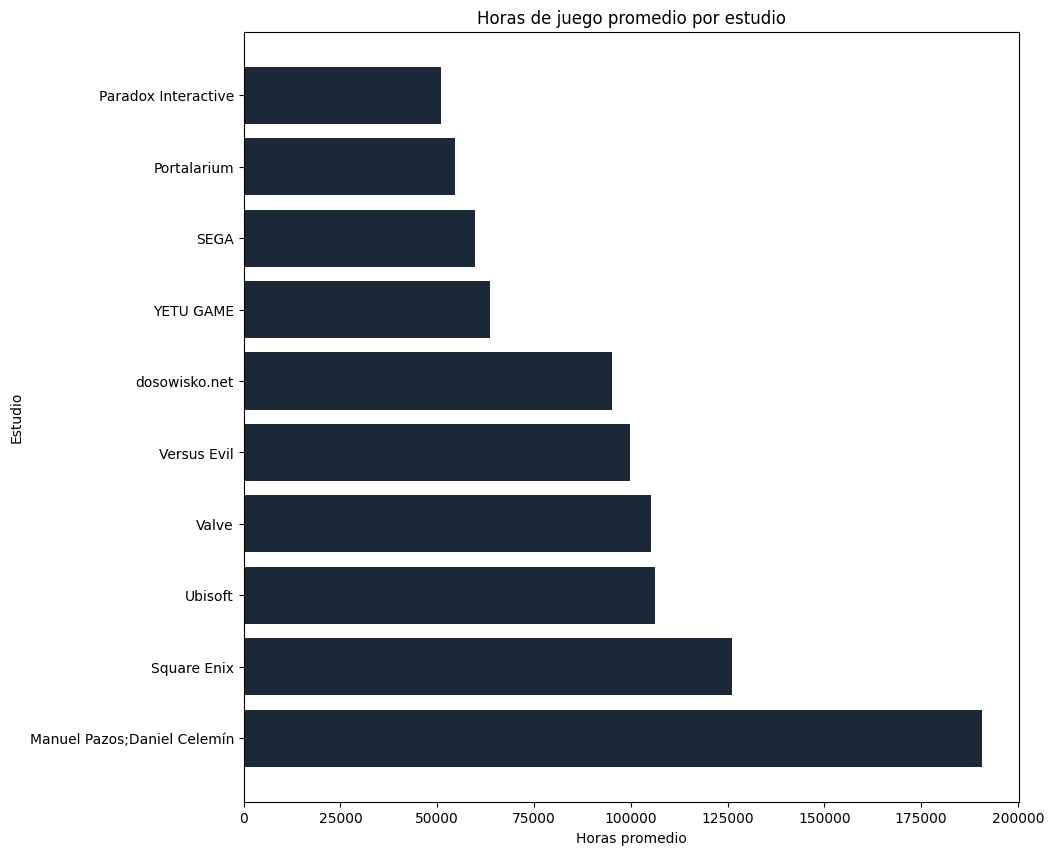

In [7]:
#Armo gráfica:

gen = gen.nlargest(10, columns=['average_playtime'])
g = gen['publisher']
h = gen['average_playtime']
cuscol = "#1B2838"

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('Horas promedio')
ax.set_ylabel('Estudio')
ax.set_title('Horas de juego promedio por estudio')
ax.barh(g,h, color = cuscol);

**Cómo es posible que Manuel Pazos; Daniel Celemín tengan más horas de juego promedio que las grandes compañías?**

In [8]:
# Busco los juegos del estudio mencionado para ver cómo se reparten las horas:

avg_ptm = st.groupby(['publisher', 'name', 'positive_ratings'])['average_playtime'].sum().reset_index()

avg_ptm = avg_ptm[avg_ptm['publisher'] == 'Manuel Pazos;Daniel Celemín']

avg_ptm

,publisher,name,positive_ratings,average_playtime
14115,Manuel Pazos;Daniel Celemín,The Abbey of Crime Extensum,146,190625


**En vista de que se trata de un título desconocido y considerando especialmente que solamente cuenta con 146 reseñas positivas, podemos concluir que al momento de analizar la gráfica anterior, este estudio claramente se debe considerar un outlier.**

**Se revisan otros posibles outliers y se realiza una limpieza del dataset para contar con información más precisa:**

In [9]:
# Defino outliers a ser eliminados
stout = ['Manuel Pazos;Daniel Celemín','dosowisko.net','Versus Evil','YETU GAME','Portalarium',]

# st = st[st.publisher.isin(stout) == False]

# stout
stdb = gen[gen["publisher"].str.contains("Manuel Pazos;Daniel Celemín|dosowisko.net|Versus Evil|YETU GAME|Portalarium") == False]

stdb

,publisher,average_playtime
11058,Square Enix,126238
12414,Ubisoft,106167
12625,Valve,105153
10196,SEGA,59749
8805,Paradox Interactive,50887


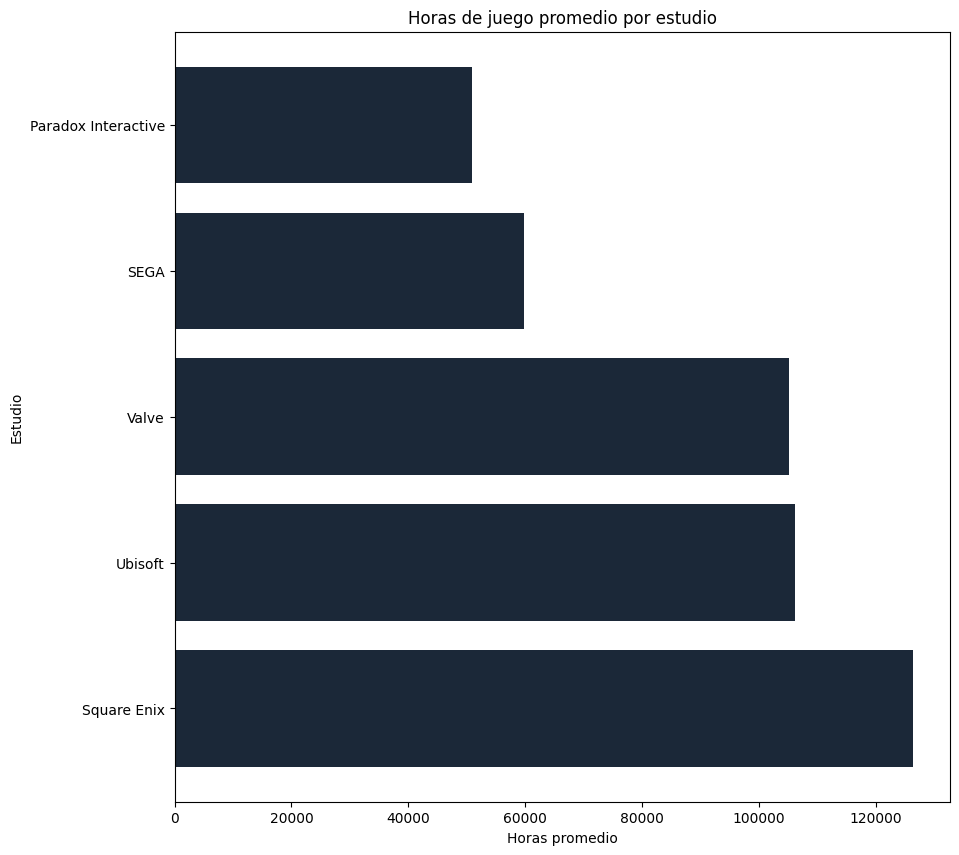

In [10]:
#Armo gráfica post limpieza de datos

stdb = stdb.nlargest(10, columns=['average_playtime'])
g = stdb['publisher']
h = stdb['average_playtime']

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('Horas promedio')
ax.set_ylabel('Estudio')
ax.set_title('Horas de juego promedio por estudio')
ax.barh(g,h, color = cuscol);

In [11]:
# Top 5 de los publishers con más títulos lanzados:

tfp = st.groupby('publisher').size().reset_index(name = 'Count')
tfp = tfp.nlargest(5 , 'Count')

tfp

,publisher,Count
1440,Big Fish Games,212
11243,Strategy First,136
12414,Ubisoft,111
11530,THQ Nordic,98
11058,Square Enix,97


**Cuáles son los estudios con más juegos publicados?**

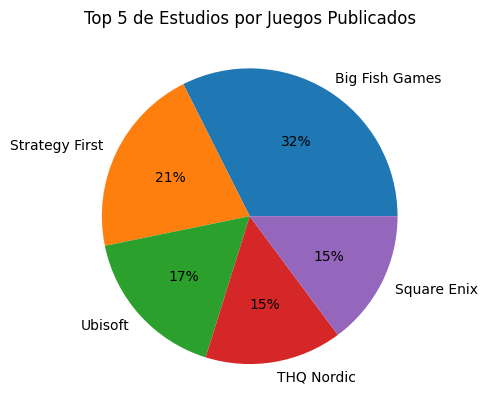

In [12]:
colors = sns.color_palette()
plt.pie(tfp['Count'], labels = tfp['publisher'], colors = colors, autopct='%.0f%%')
plt.title('Top 5 de Estudios por Juegos Publicados')
plt.show()

**Conclusión: Comparando ambas gráficas, debería haber una coincidencia mayoritaria entre los valores top 5-10 de ambas para respaldar el cumplimiento de la hipótesis planteada. No obstante, la cantidad de estudios con más juegos publicados que se pueden apreciar en la segunda gráfica, no coinciden con los estudios con más horas de juego promedio que se aprecian en la primera gráfica (solamente hay una coincidencia en 2 elementos). Es por esto que se puede concluir que la hipótesis planteada inicialmente para este caso no se cumple.**

# Hipótesis 2: el precio promedio de la librería aumenta anualmente.

**Existe un aumento sostenido del precio promedio año a año?**

In [13]:
spy = st.groupby('Year')['price'].mean().reset_index(name = 'Price')

spy

,Year,Price
0,1997,5.990000
1,1998,7.190000
2,1999,3.990000
3,2000,5.590000
4,2001,1.995000
5,2002,7.990000
6,2003,2.993333
7,2004,5.758333
8,2005,4.026667
9,2006,7.558542


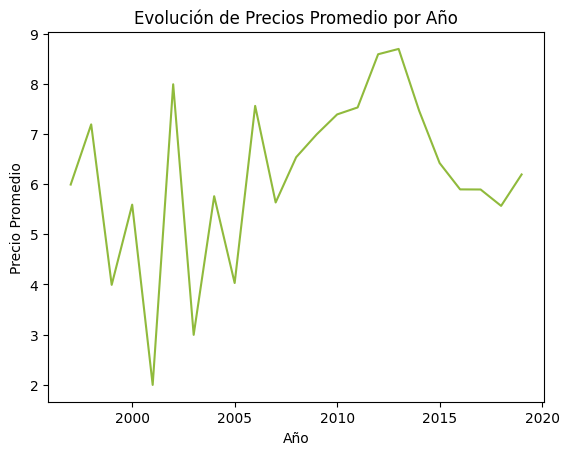

In [14]:
coline = '#90BA3C'
sns.lineplot(x = "Year", y = "Price", data = spy, color = coline).set(title='Evolución de Precios Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Precio Promedio');

**Conclusión: Para que la hipótesis planteada en este caso se cumpla, debería existir un crecimiento lineal sostenido en el eje 'y' de precios promedio. La existencia de picos en la gráfica más allá de los valores apreciados en la tabla generada para la realización del gráfico muestran altibajos pronunciados en los precios promedio a pesar de que en algunos periodos parece haber un crecimiento sostenido que eventualmente vuelve a bajar. La existencia de dichos altibajos indican que claramente, esta hipótesis no se cumple.**

# Hipótesis 3: los juegos más caros tienen más valoraciones positivas.

**Existe una relación directa entre el precio de un juego y sus valoraciones positivas?**

C:\Users\REXp\AppData\Local\Temp\ipykernel_14136\3847496373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sct['Géneros'] = sct['Géneros'].str.split(';')


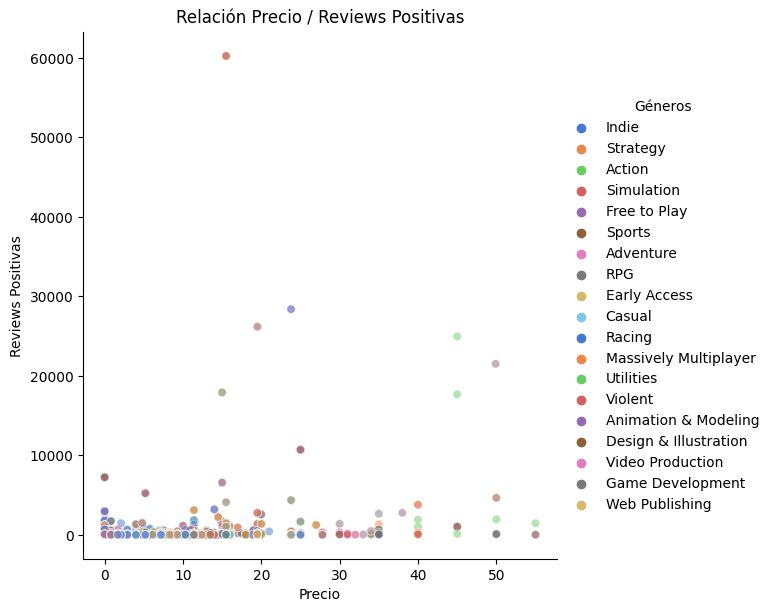

In [ ]:
sct = st
sct.rename(columns={'genres': 'Géneros'}, inplace=True)
sct = st[st['Year'] == 2019]
sct['Géneros'] = sct['Géneros'].str.split(';')
sct = sct.explode('Géneros')

sns.relplot(x="price", y="positive_ratings", hue="Géneros", sizes=(40, 400), alpha=.5, palette="muted", height=6, data=sct)
plt.title('Relación Precio / Reviews Positivas')
plt.xlabel('Precio')
plt.ylabel('Reviews Positivas');

**Conclusión: no parece haber una relación directa entre el precio de un juego y la cantidad de valoraciones positivas del mismo, ya que de ser así, se apreciaría una mayor concentración de valores sobre el lado derecho de la gráfica con puntos más altos que el sector izquierdo. En cambio, se nota claramente un nivel parejo de reseñas positivas en el eje 'y' a lo largo del eje 'x' con algunas pocas excepciones que no hacen una diferencia significativa como para poder concluir el cumplimiento de la hipótesis a la que hace referencia esta gráfica. No se puede asegurar que a mayor precio del juego la cantidad de reseñas positivas es mayor, por lo tanto la hipótesis no se cumple.**

# **Recomendaciones, problemática y contexto**

Este set de datos resulta de enorme utilidad al momento de analizar un contexto de altísima competencia entre los estudios más fuertes y sus títulos de cabecera, y también otros estudios menores y/o independientes con títulos que resultan ser grandes éxitos en comparación con títulos que contaron con un presupuesto mayor y más recursos.

El tener la posibilidad de analizar el comportamiento de los usuarios de la plataforma de Steam al momento de comprar y evaluar los títulos que compran permite estudiar las tendencias y las variaciones (y en algunos casos la relación entre sí) para elaborar campañas de marketing y visibilidad más sólidas y con información más clara.

En una industria que crece constantemente como lo es la del gaming, es fundamental contar con información limpia, ordenada y precisa para entender el comportamiento del mercado y sus usuarios.

Se recomienda el estudio en profundidad de las valoraciones positivas/negativas de los títulos, la comparación de precios con títulos similares de otros estudios y entender de qué manera los usuarios de la plataforma se manejan al momento de elegir un género, un título o un estudio.

## Integración con API

Se hace uso de la API de RAWG Games Database con el fin de obtener información de todos los juegos calificados por RAWG y contrastar dicha información con las calificaciones recibidas en la plataforma de Steam.

In [26]:
# Para utilizar esta API fue necesario realizar autenticación con RAWG y así obtener un token de acceso.

url = 'https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff'

# Verificamos conexión con la API:
resp = requests.get(url)
print(resp)

data = resp.json()

<Response [200]>


In [27]:
# La API tiene la información divida por páginas y por lo tanto fue necesario crear un loop para obtener 
# los datos página por página.

lista = []

try:
 
  while url:
    print('~~~~~~~~~~~~~')
    print('Obteniendo datos...', url)
    
    resp = requests.get(url)
    data = resp.json()
    
    lista.extend(data['results'])

    url = data['next']

except json.decoder.JSONDecodeError:
   print('Obtención de datos finalizada.')

~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=2
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=3
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=4
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=5
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=6
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=7
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=8
~~~~~~~~~~~~~
Obteniendo datos... https://api.rawg.io/api/games?key=cf7639a09bf5490488e1ca8750cdbfff&page=9
~~~~~~~~~~~~~
Obteniendo datos... h

KeyboardInterrupt: ignored

In [28]:
# Utilizamos Pandas para crear un DF con el JSON obtenido de la API:

jsondata = lista
df = pd.DataFrame.from_dict(jsondata)
df.head()

newdata = df[['name','rating']].copy()
print(newdata)

                                    name  rating
0                     Grand Theft Auto V    4.47
1               The Witcher 3: Wild Hunt    4.66
2                               Portal 2    4.62
3                     Tomb Raider (2013)    4.05
4       Counter-Strike: Global Offensive    3.56
...                                  ...     ...
20375                        Spy vs. Spy    3.91
20376  Tactics Ogre: The Knight of Lodis    4.00
20377             Mega Man Zero 3 (2004)    4.36
20378               Wrecking Crew (1985)    3.84
20379                Lunar: Eternal Blue    3.70

[20380 rows x 2 columns]


In [29]:
# El sistema de rating de RAWG obtenido con la API es una escala de likert de 1 a 5.
# El sistema de rating de Steam está basado en ratings positivas vs ratings negativas.
# Teniendo en cuenta que para poder comparar las ratings las mismas deberían estar en la misma escala 
# se planteó una regla de 3 para dar un valor porcentual a las valoraciones de Steam y posteriormente convertirlas a una escala
# de 1 a 5 como la de RAWG.

preperc = (st['positive_ratings'] + st['negative_ratings']) 

column_names = ["lasuma"]
nprep = pd.DataFrame(preperc, columns = column_names)

nprep = nprep.loc[nprep['lasuma'] > 1 ]
nprep['lasuma'] = nprep['lasuma'].astype(float) 
cprep = (st['positive_ratings'] * 100) / nprep['lasuma']
cprep = cprep.dropna()

print(cprep)

0         97.388815
1         83.978740
2         89.564761
3         82.662338
4         94.799567
            ...    
27069     50.000000
27070    100.000000
27071     88.888889
27073    100.000000
27074    100.000000
Length: 26061, dtype: float64


<ipython-input-29-d3fde0c70779>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nprep['lasuma'] = nprep['lasuma'].astype(float)


In [30]:
# Para crear la escala de 1 a 5 se utilizó la regla para dar valores porcentuales y se definió una franja separada cada 20% 
# logrando 5 franjas de 20% (1 a 5).

cname = ['Steam 1 to 5']
stof = pd.DataFrame(cprep, columns = cname)
          
stof.loc[(stof['Steam 1 to 5'] > 0) & (stof['Steam 1 to 5'] <= 20)] = 1
stof.loc[(stof['Steam 1 to 5'] > 20) & (stof['Steam 1 to 5'] <= 40)] = 2
stof.loc[(stof['Steam 1 to 5'] > 40) & (stof['Steam 1 to 5'] <= 60)] = 3
stof.loc[(stof['Steam 1 to 5'] > 60) & (stof['Steam 1 to 5'] <= 80)] = 4
stof.loc[(stof['Steam 1 to 5'] > 80) & (stof['Steam 1 to 5'] <= 100)] = 5       

In [31]:
# Se agregan las nuevas columnas al Dataset principal para presentar la información:

st['Steam 1 to 5'] = stof['Steam 1 to 5']
st['Name2'] = newdata['name']
st['Rating2'] = newdata['rating']

st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Year,Steam 1 to 5,Name2,Rating2
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,124534,3339,17612,317,10000000-20000000,7.19,2000,5.0,Grand Theft Auto V,4.47
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,3318,633,277,62,5000000-10000000,3.99,1999,5.0,The Witcher 3: Wild Hunt,4.66
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,3416,398,187,34,5000000-10000000,3.99,2003,5.0,Portal 2,4.62
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,1273,267,258,184,5000000-10000000,3.99,2001,5.0,Tomb Raider (2013),4.05
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,5250,288,624,415,5000000-10000000,3.99,1999,5.0,Counter-Strike: Global Offensive,3.56


In [43]:
# Creamos un nuevo df con la información puntual que se utilizará para el análisis:
# Al contar con 2 columnas de juegos (una proveniente del dataset original y otra de la API) fue necesario unificar los datos
# para así obtener una columna única que contara con juegos puntuados tanto en Steam como en RAWG:

colnam = st[['name', 'Name2', 'Steam 1 to 5', 'Rating2']]

uniname = pd.merge(colnam[['name', 'Steam 1 to 5']],colnam[['Name2', 'Rating2']],left_on=['name'],right_on=['Name2'],how='left')

nuname = uniname.drop('Name2', axis=1)
nuname = nuname[nuname['Rating2'].notna()]
nuname.shape

nuname.head()

,name,Steam 1 to 5,Rating2
0,Counter-Strike,5.0,4.04
1,Team Fortress Classic,5.0,2.95
2,Day of Defeat,5.0,2.84
3,Deathmatch Classic,5.0,2.77
4,Half-Life: Opposing Force,5.0,3.85


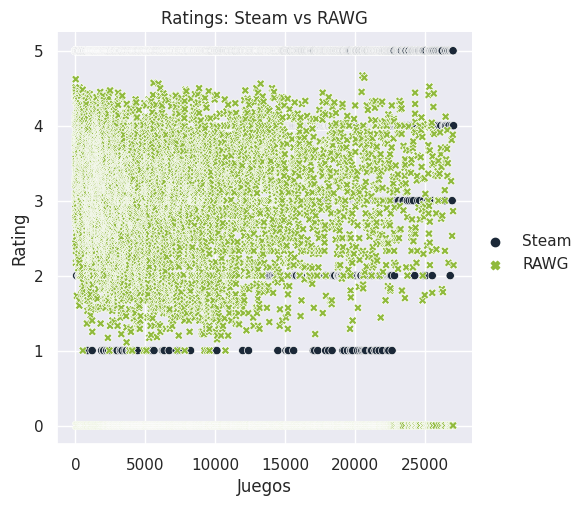

In [45]:
# Se realiza un diagrama de dispersión utilizando Seaborn:
nuname.rename(columns={'name': 'Juego', 'Steam 1 to 5' : 'Steam', 'Rating2' : 'RAWG'}, inplace=True)

colore = ["#1B2838", '#90BA3C']
sns.set_palette(sns.color_palette(colore))
scat = sns.relplot(data=nuname)
scat.set(title='Ratings: Steam vs RAWG')
scat.set_xlabels('Juegos')
scat.set_ylabels('Rating')
plt.show()